In [173]:
# Import Python library for working with dataframes
import pandas as pd
import numpy as np

# Enables inline display of plots within the Python Notebook (instead of having them pop up on new windows)
%matplotlib inline

# Display figures the same way they will be saved.
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight'}

# Import Python libraries for plotting
import seaborn as sns
sns.set_theme(style="white")
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams.update({
    'figure.dpi': 300,
    "font.family": "serif",
})

In [304]:
# Load the dataset
# The ELLIPSE dataset ("ELLIPSE_Final_github.csv") can be downloaded from the following link: https://github.com/scrosseye/ELLIPSE-Corpus
df = pd.read_csv('../data/ELLIPSE_Final_github.csv')

In [305]:
# Allows us to take a quick look at the loaded dataframe
df.head()

,text_id_kaggle,full_text,gender,grade,race_ethnicity,num_words,num_words2,num_words3,num_sent,num_para,...,task,SES,prompt,Overall,Cohesion,Syntax,Vocabulary,Phraseology,Grammar,Conventions
0,5AA45740A848,"Dear, TEACHER_NAME\n\nI think phone policy at ...",Male,8,Hispanic/Latino,111,122,118,7,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,3.5,2.5,3.5,3.0,3.5,2.5
1,790891A35047,"Dear, Principal\r\n\r\nIn my opinion, I think ...",Female,8,Hispanic/Latino,99,105,102,6,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.5,3.0,4.0,3.5,3.0,3.5
2,C254D74362A3,PHONES\n\nDear principal students should have ...,Female,8,Hispanic/Latino,121,134,128,4,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.5,3.0,3.0,3.0,3.5,3.0
3,0985602832CD,phones\n\ni think phones should be allowed in ...,Male,8,Hispanic/Latino,182,202,192,2,2,...,Independent,Economically disadvantaged,Cell phones at school,3.0,2.0,2.5,3.0,3.0,3.0,2.5
4,3AB3FC197550,Do you really think students need cell phones ...,Female,8,Hispanic/Latino,192,210,201,11,4,...,Independent,Not economically disadvantaged,Cell phones at school,3.0,2.0,3.0,3.0,3.0,3.0,2.0


In [8]:
# Print out the name of all columns in the dataframe
df.columns

Index(['text_id_kaggle', 'full_text', 'gender', 'grade', 'race_ethnicity',
       'num_words', 'num_words2', 'num_words3', 'num_sent', 'num_para',
       'num_word_div_para', 'MTLD', 'TTR', 'Type', 'Token', 'task', 'SES',
       'prompt', 'Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology',
       'Grammar', 'Conventions'],
      dtype='object')

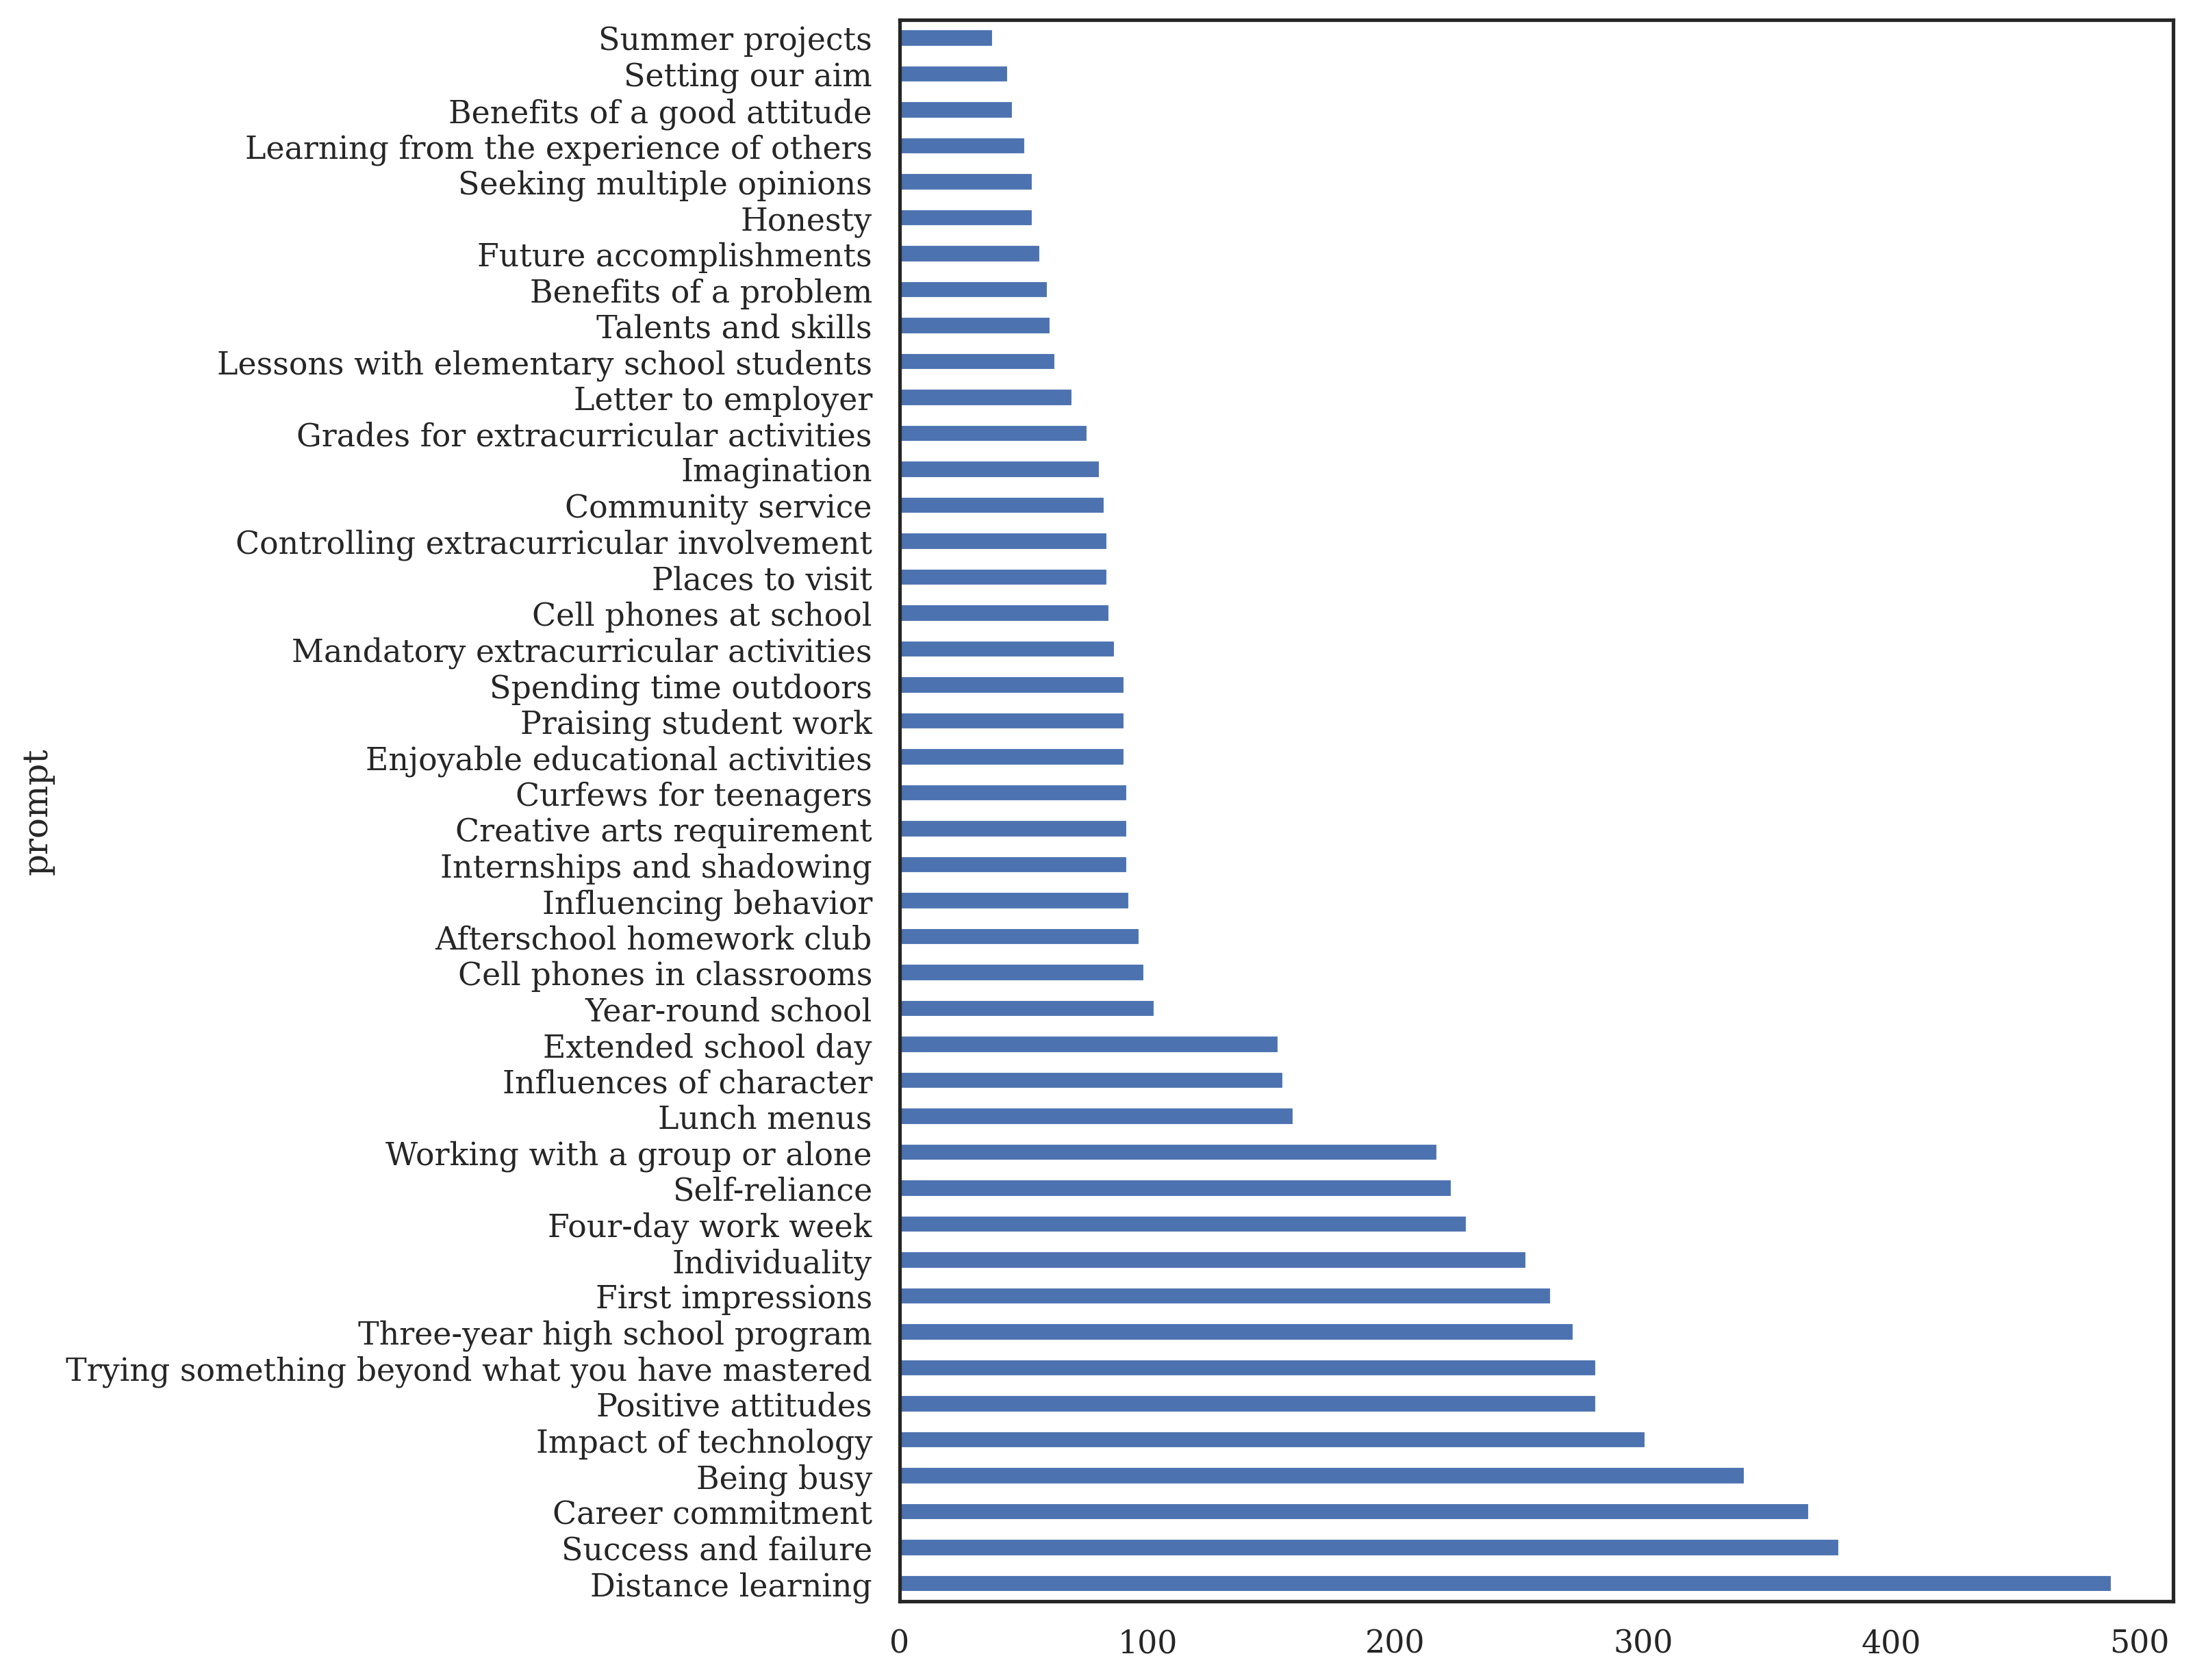

In [9]:
# Create a horizontal bar plot (bar'h') using the values in the 'prompt' column of the dataframe
# Semicolon is added at the end of the line to suppress some unwanted information from being printed
df.prompt.value_counts().plot.barh(figsize=(8,10));

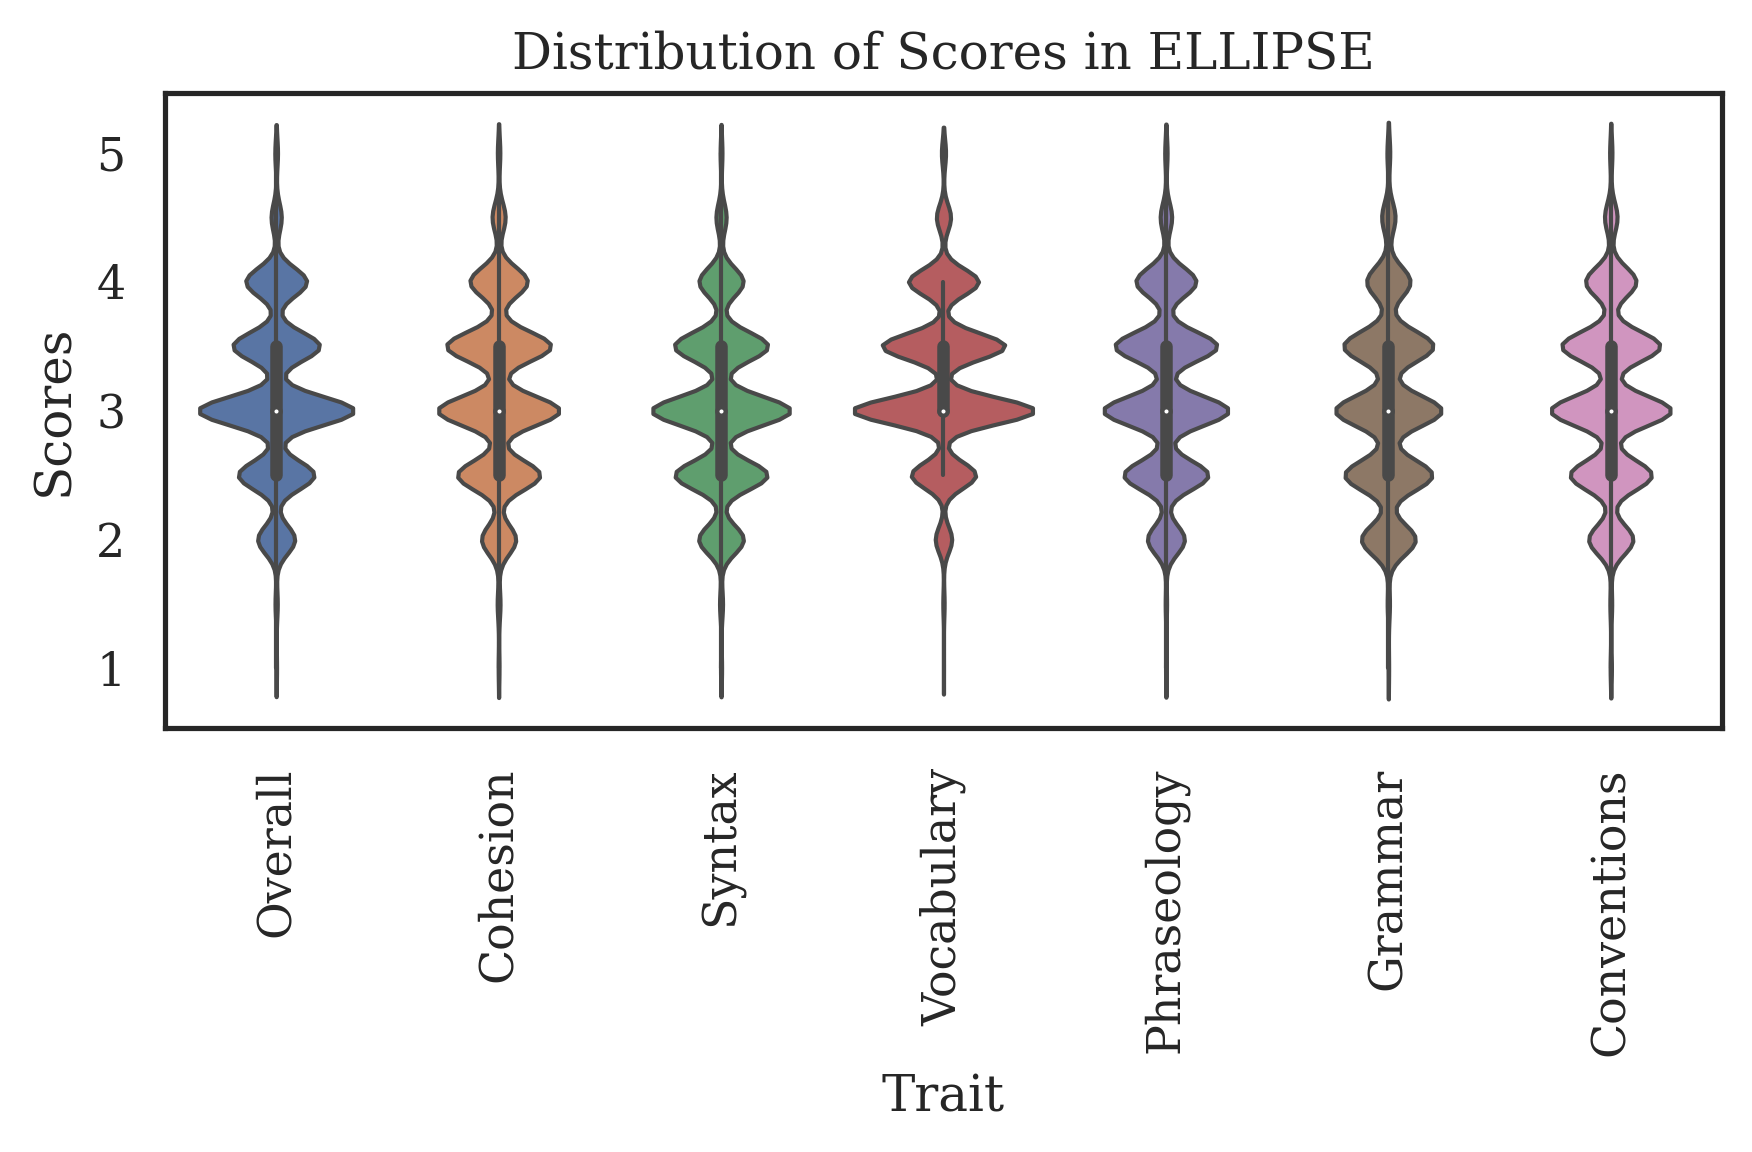

In [10]:
# Initialize list of variables that we are interested in inspecting and visualizing
scores = ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']
categorical = ['race_ethnicity', 'gender', 'grade', 'SES']

# Initialize plot. Number inside the parentheses denote the plot's size in inches
f = plt.figure(figsize=(6, 4))

# Create violinplot that displays the distribution of different scores in the ELLIPSE corpus dataframe
g = sns.violinplot(x='variable', y='value',
                   data=df.melt(id_vars=['text_id_kaggle'], value_vars=scores),
                   linewidth=1,
                   inner='box',
                  )
for label in g.get_xticklabels():
    label.set_rotation(90)

# Change labels for x axis and y axis and title. Adjust paddings around the plot. 
g.set(xlabel='Trait', ylabel='Scores', title='Distribution of Scores in ELLIPSE')
f.tight_layout()

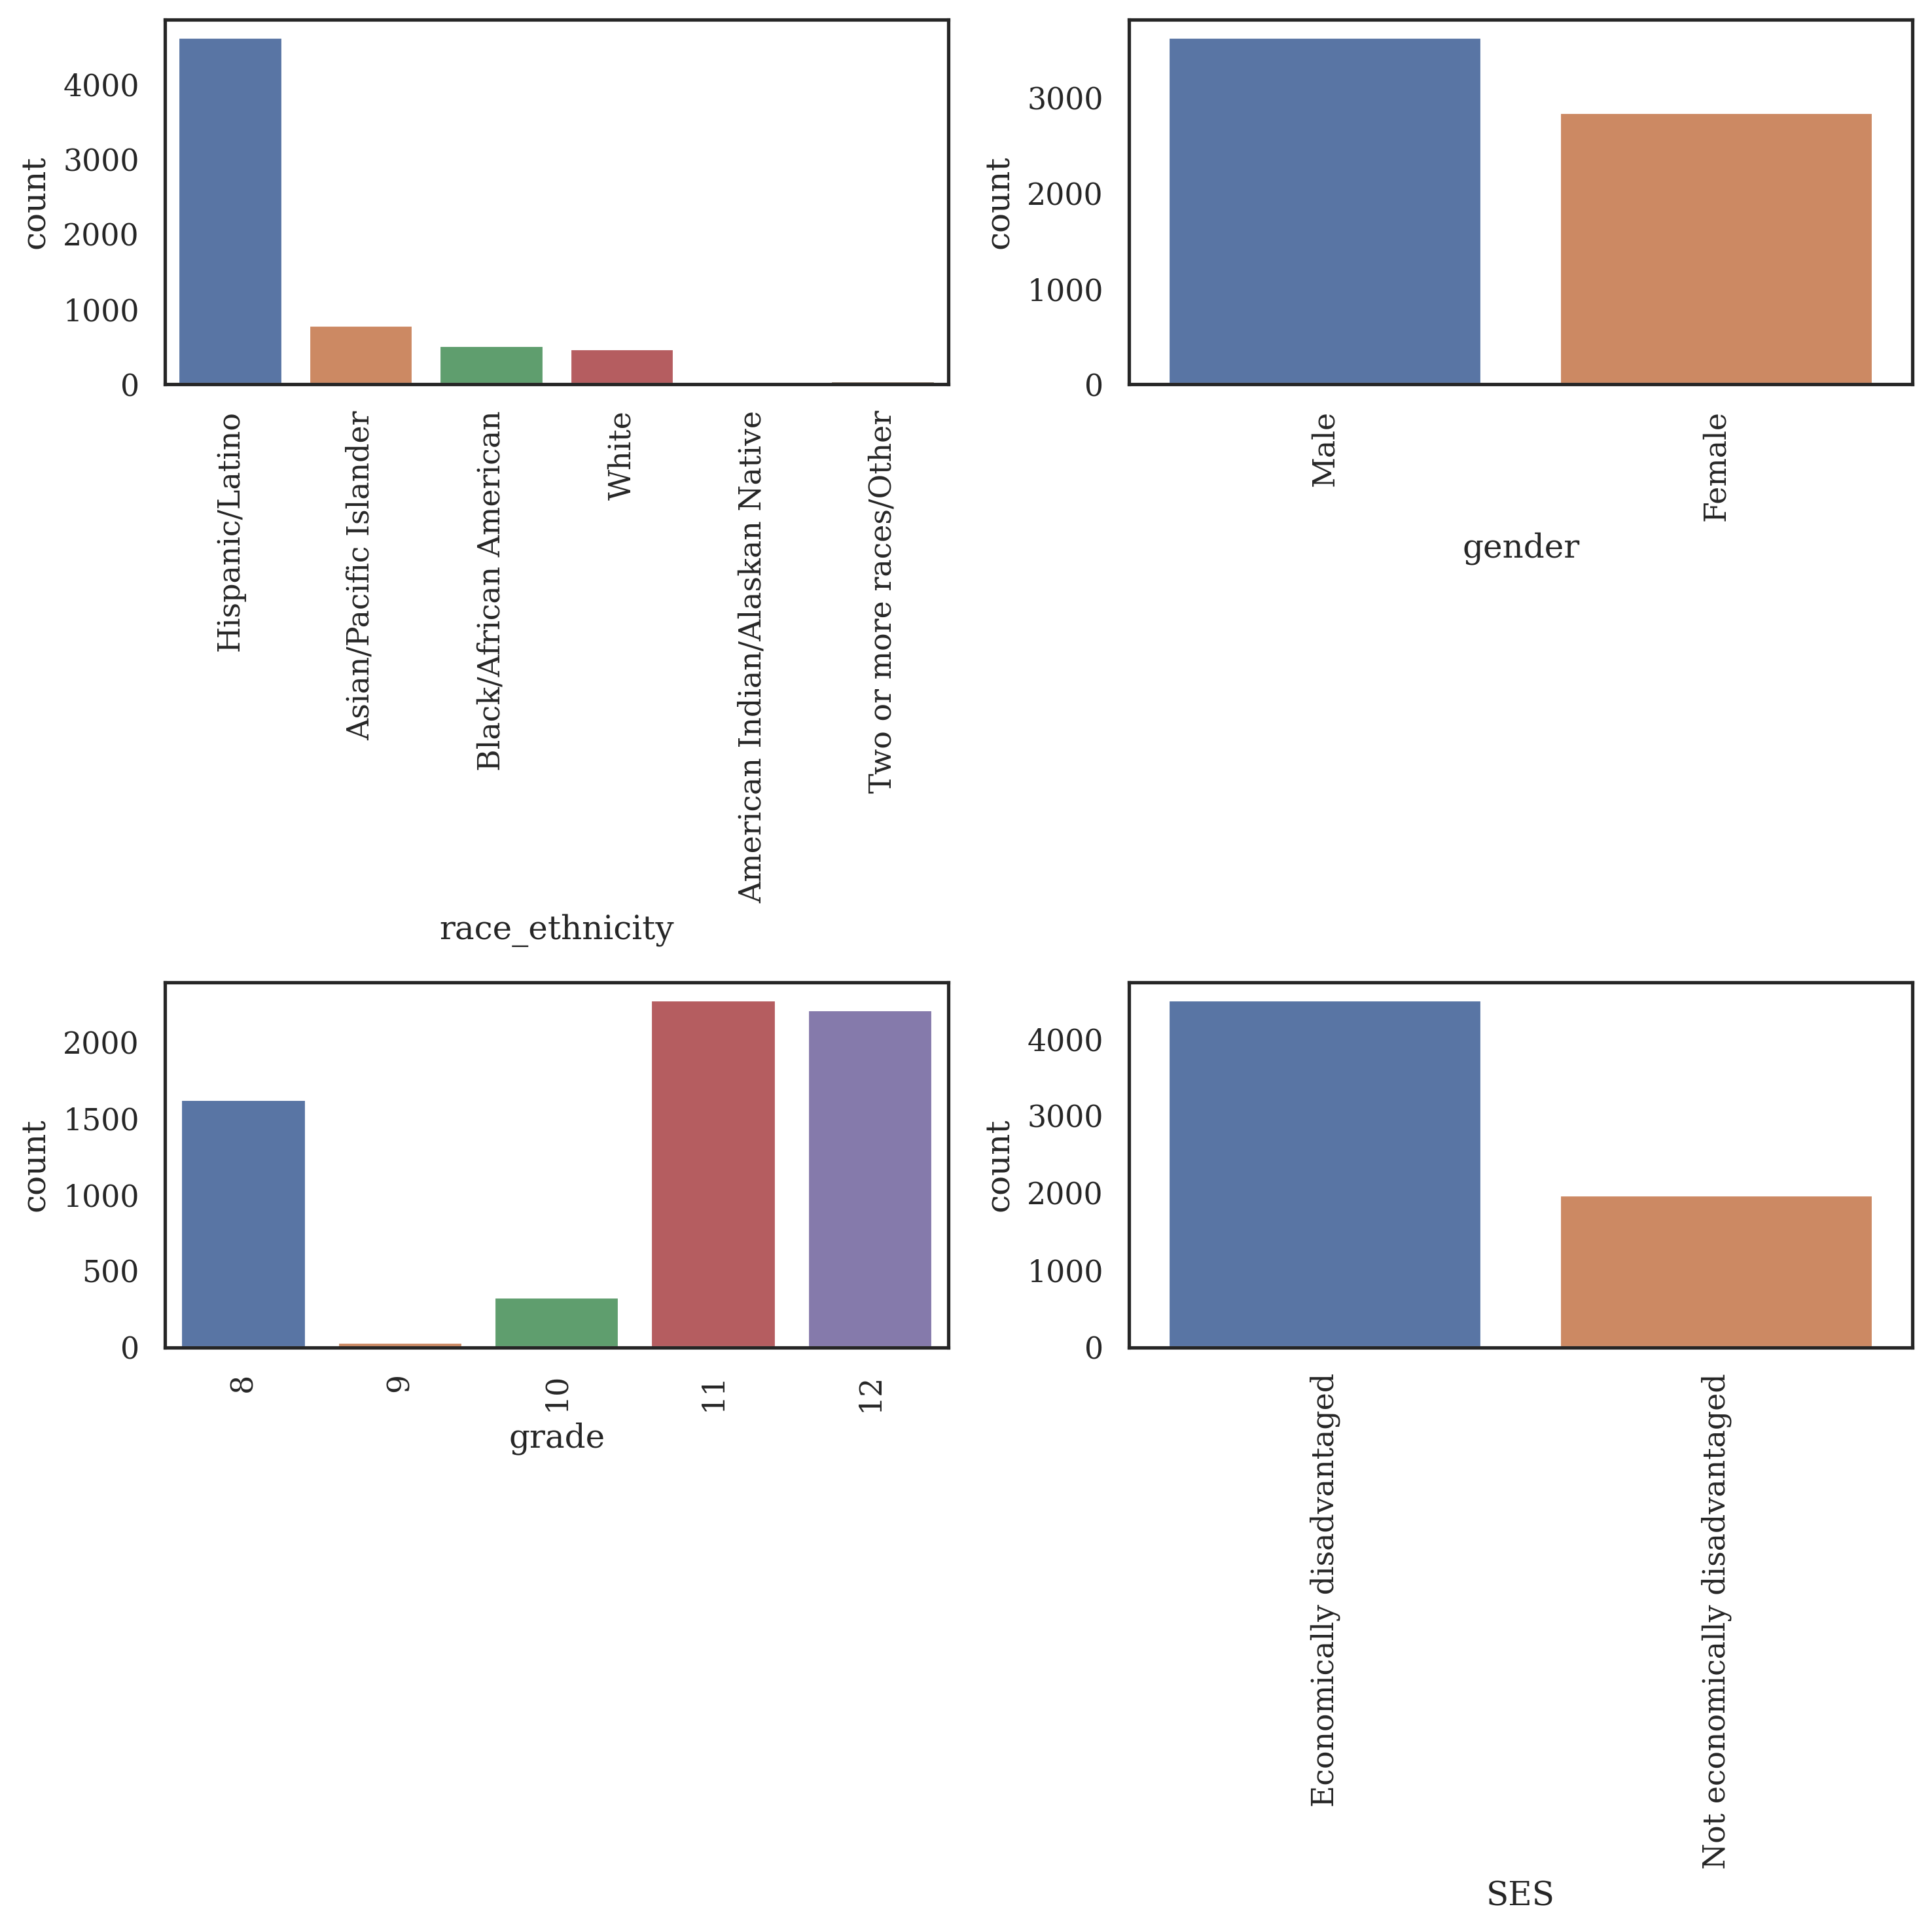

In [11]:
# Initialize new plots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Iterate over the different categories of demographic information using the list we created in the previous cell
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(x=df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

fig.tight_layout()

## Load the scores before Adjudication
We calculate the inter-rater reliability using Quadratic Weighted Kappa.

We need the scores from each reviewer (before adjudication) to calculate the inter-rater reliability.

In [418]:
# This version of the data includes rater names
# We exclude these columns to prevent any names from being printed in the notebook
both_raters = pd.read_csv('../data/ell_raw_scores_0627.csv', usecols=lambda x: not x.startswith('Rater'))

# We need to link the Filenames to the Kaggle IDs
both_keys = pd.read_csv('../data/ELLIPSE_Final_w_org_kaggle_id.csv', index_col=1, usecols=['text_id_kaggle', 'text_id_original'], dtype=str)

### Fix malformed text identifiers
As data is moved between programming languages and analysis softwares (Excel, R, Python, etc.), data types can become confused and malformed.

27 text IDs were misinterpreted as integers by one of these softwares and then saved as a string in the form '3.99E+11' or '3.98662E+11'. This happened at least twice, with different levels of precision each time. To realign the dataframes, we need to address this issue.

In [419]:
# Some identifiers that were converted to scientific notation in our two dataframes (with different levels of precision/rounding)
print(df[df.text_id_kaggle.str.contains('E\+')].text_id_kaggle.tail())
print(both_keys[both_keys.text_id_kaggle.str.contains('E\+')].text_id_kaggle.tail())

5405    6.07E+11
5757    9.92E+12
5924    4.96E+11
6088    4.31E+11
6251    3.99E+11
Name: text_id_kaggle, dtype: object
text_id_original
AAAXMP138200001051272104_OR    6.06503E+11
AAAXMP138200001471962810_OR       9.92E+12
AAAXMP138200001656692850_OR    4.96459E+11
AAAXMP138200001847862125_OR    4.30762E+11
AAAXMP138200002001322850_OR    3.98662E+11
Name: text_id_kaggle, dtype: object


In [420]:
# Print how many samples contain 'E+' in the text_id_kaggle column
print(both_keys.text_id_kaggle.str.contains('E\+').sum())

# Construct a boolean indexer to pull these malformed IDs out
id_is_scientific_notation = both_keys.text_id_kaggle.str.contains('E\+')

# Wherever a malformed ID exists, convert it to a float then back to scientific notation with only 2 decimal places of precision
both_keys.loc[id_is_scientific_notation, 'text_id_kaggle'] = both_keys[id_is_scientific_notation].text_id_kaggle.astype(float).map(lambda x: '{:.2E}'.format(x))

27


In [421]:
# Remove the file extension in the filename to get the original text id
# Some filenames looked like FILE_ID_cleaned.txt, so we use a regular expression to remove that as well

both_raters['text_id_original'] = both_raters['Filename'].str.extract(r'(.*?)(?:_cleaned)?.txt', expand=False)

In [422]:
# map the text_id_original to text_id_kaggle
both_raters['text_id_kaggle'] = both_raters.text_id_original.map(both_keys['text_id_kaggle'])
both_raters = both_raters[both_raters.text_id_kaggle.notnull()]

# Drop duplicate entries. The second/last entry is the cleaned version of the text, so we keep that one.
both_raters.drop_duplicates(subset=['text_id_kaggle'], keep='last', inplace=True)


Next, we check that the text IDs are the same in both dataframes.

In [423]:
df[~df.text_id_kaggle.isin(both_raters.text_id_kaggle)].text_id_kaggle

Series([], Name: text_id_kaggle, dtype: object)

In [424]:
both_raters[~both_raters.text_id_kaggle.isin(df.text_id_kaggle)].text_id_kaggle

Series([], Name: text_id_kaggle, dtype: object)

In [425]:
both_raters

,Filename,Text,Overall_1,Cohesion_1,Syntax_1,Vocabulary_1,Phraseology_1,Grammar_1,Conventions_1,Identifying_Info_1,Overall_2,Cohesion_2,Syntax_2,Vocabulary_2,Phraseology_2,Grammar_2,Conventions_2,Identifying_Info_2,text_id_original,text_id_kaggle
1,2021000501.txt,"Dear, TEACHER_NAME\r\n\r\nI think phone policy...",3,3,2,3,3,3,2,0,3,4,3,4,3,4,3,0,2021000501,5AA45740A848
2,2021000535.txt,"Dear, Principal\r\n\r\nIn my opinion, I think ...",3,2,3,2,2,3,3,0,3,3,3,4,3,3,4,0,2021000535,790891A35047
3,2021000667.txt,PHONES\r\n\r\nDear principal students should h...,3,2,3,3,3,3,3,0,3,3,3,3,3,4,3,0,2021000667,C254D74362A3
4,2021000683.txt,phones\r\n\r\ni think phones should be allowed...,3,2,3,3,3,3,3,0,3,2,2,3,3,3,2,0,2021000683,0985602832CD
5,2021000705.txt,Do you really think students need cell phones ...,3,2,3,3,3,3,2,0,3,2,3,3,3,3,2,0,2021000705,3AB3FC197550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8884,AAAXMP138200002211022133_OR.txt,The decision regarding extracurricular involve...,4,4,4,3,4,4,4,0,4,4,4,4,4,4,5,0,AAAXMP138200002211022133_OR,F78366DD5A31
8885,AAAXMP138200002211062115_OR.txt,"The school plans to change to a new, healthier...",3,3,3,3,3,3,3,0,4,4,3,4,3,4,4,0,AAAXMP138200002211062115_OR,21741500885B
8886,AAAXMP138200002211752151_OR.txt,I raised by my grandparents and they always to...,4,4,3,4,4,3,4,0,4,4,3,4,4,3,4,0,AAAXMP138200002211752151_OR,56F9E8427D97
8888,AAAXMP138200002214212144_OR.txt,Imagine the world if students didn't complete ...,4,4,4,4,4,3,3,0,3,3,3,4,4,3,3,0,AAAXMP138200002214212144_OR,7D44F3E6C475


In [426]:
from sklearn.metrics import cohen_kappa_score

In [427]:
for score in ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']:
    qwk = cohen_kappa_score(both_raters[f'{score}_1'], both_raters[f'{score}_2'], weights='quadratic')
    print(f'{score}: {qwk:.3f}')

Overall: 0.589
Cohesion: 0.497
Syntax: 0.511
Vocabulary: 0.484
Phraseology: 0.511
Grammar: 0.532
Conventions: 0.518


# Why are these scores lower?

Let's run it on the raw dataset to make sure they match the reported values.

In [430]:
both_raters = pd.read_csv('../data/ell_raw_scores_0627.csv', usecols=lambda x: not x.startswith('Rater'))

for score in ['Overall', 'Cohesion', 'Syntax', 'Vocabulary', 'Phraseology', 'Grammar', 'Conventions']:
    qwk = cohen_kappa_score(both_raters[f'{score}_1'], both_raters[f'{score}_2'], weights='quadratic')
    print(f'{score}: {qwk:.3f}')

Overall: 0.521
Cohesion: 0.437
Syntax: 0.442
Vocabulary: 0.413
Phraseology: 0.437
Grammar: 0.475
Conventions: 0.471
